# Introduction to high-level tensorflow 2.0 using keras
(adapted from https://www.tensorflow.org/tutorials/quickstart/beginner).

In [1]:
# get tensorflow 2.0 (run once per session)
# pip install tensorflow==2.0

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('tensorflow version: ' + tf.__version__)

tensorflow version: 2.9.0


In [3]:
# load mnist dataset
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # customary normalization to [0, 1]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Standard Scaling the data
print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

x_train = (x_train-x_train.mean())/x_train.std()
x_test = (x_test-x_test.mean())/x_test.std()

print('Train', x_train.min(), x_train.max(), x_train.mean(), x_train.std())
print('Test', x_test.min(), x_test.max(), x_test.mean(), x_test.std())

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
Train 0.0 1.0 0.1306604762738429 0.3081078038564622
Test 0.0 1.0 0.13251460584233699 0.3104802479305348
Train -0.4240738943915667 2.8215433456893395 -8.196738828119618e-17 1.000000000000001
Test -0.4268052693386959 2.794011535161327 -2.251287591722145e-16 1.0000000000000004


## Simple, two-layer, fully-connected neural network

In [4]:
# define the sequential model (i.e., each layer follows sequentially from the previous)
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # fully-connected, so flatten the image
    tf.keras.layers.Dense(units=128, activation='relu'),  # hidden layer has 128 units
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

simple_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss (shoud use this for multi-class classification)
                     metrics=['accuracy'])  # pick a metric to monitor

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-22 16:19:27.976827: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-22 16:19:27.976980: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# train model and track validation loss after each epoch:
simple_model.fit(x_train, y_train,
                 epochs=5,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/5


2023-02-22 16:19:35.271444: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-22 16:19:35.495798: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.3630 - accuracy: 0.8907

2023-02-22 16:19:46.628201: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 6ms/step - loss: 0.3629 - accuracy: 0.8907 - val_loss: 0.1433 - val_accuracy: 0.9574
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2025 - accuracy: 0.9396 - val_loss: 0.1265 - val_accuracy: 0.9618
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1726 - accuracy: 0.9474 - val_loss: 0.1067 - val_accuracy: 0.9658
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1527 - accuracy: 0.9534 - val_loss: 0.0957 - val_accuracy: 0.9710
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1389 - accuracy: 0.9576 - val_loss: 0.0963 - val_accuracy: 0.9729


In [6]:
# let's examine some sample predictions:
#prediction = simple_model.predict_classes(x_test) - this is depreciated
prediction = np.argmax(simple_model.predict(x_test), axis=-1)

print(prediction)
print(y_test)
# incorrect predictions:
incorrect = prediction != y_test
incorrect_indices = np.where(incorrect)[0]
print('error rate = ' + str(np.mean(incorrect)))  # should be 1 - val_accuracy
print('These are the indices corresponding to the test samples that our model got wrong:')
print(incorrect_indices)

 71/313 [=====>........................] - ETA: 0s

2023-02-22 16:20:50.350840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
error rate = 0.0271
These are the indices corresponding to the test samples that our model got wrong:
[   8  115  151  241  247  259  274  321  340  381  445  447  449  551
  582  591  610  619  659  684  691  707  720  740  810  839  844  881
  882  900  947  951  956  965 1014 1032 1039 1107 1112 1181 1192 1226
 1232 1242 1247 1260 1299 1319 1326 1337 1364 1393 1500 1522 1530 1549
 1553 1621 1640 1641 1681 1709 1717 1751 1754 1790 1800 1850 1878 1901
 1941 1952 2001 2016 2043 2044 2053 2070 2093 2098 2109 2118 2130 2135
 2168 2182 2189 2272 2291 2293 2299 2325 2369 2380 2387 2406 2414 2422
 2433 2454 2462 2597 2598 2607 2648 2654 2720 2810 2877 2907 2915 2921
 2927 2939 2953 2979 2995 3005 3060 3073 3115 3117 3206 3289 3376 3422
 3475 3503 3520 3549 3558 3567 3597 3662 3702 3751 3757 3767 3776 3780
 3796 3808 3817 3821 3838 3853 3869 3893 3906 3926 3941 3951 3985 4063
 4065 4075 4078 4163 4176 

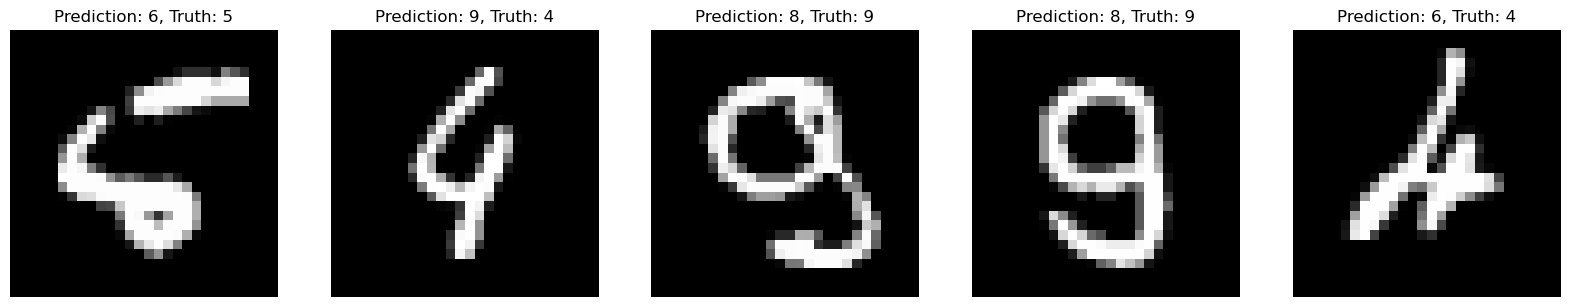

In [7]:
# plot 5 examples of wrong classifications:
plt.figure(figsize=(20, 5))
for i, i_wrong in enumerate(incorrect_indices[:5]):
  plt.subplot(1, 5, i + 1)
  plt.imshow(x_test[i_wrong], cmap='gray')
  plt.title('Prediction: ' + str(prediction[i_wrong]) + ', Truth: ' + str(y_test[i_wrong]))
  plt.axis('off')
plt.show()

## Convolutional neural network example

In [8]:
# because we're using CNNs, the data needs a channel dimension:
x_train = x_train[..., None]
x_test = x_test[..., None]

In [9]:
cnn_model = tf.keras.models.Sequential([
    # let's add some convolutional layers:
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'),
    # now, let's transition into a fully-connected layer; first, we flatten:
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')  # length-10 output for classification
])

cnn_model.compile(optimizer='adam',  # pick an optimizer
                     loss='sparse_categorical_crossentropy',  # pick a loss
                     metrics=['accuracy'])  # pick a metric to monitor

In [10]:
# train model and track validation loss after each epoch:
cnn_model.fit(x_train, y_train,
              epochs=2,
              batch_size=32,
              validation_data=(x_test, y_test))

Epoch 1/2


2023-02-22 16:23:40.843122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.9589

2023-02-22 16:23:56.778875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.1332 - accuracy: 0.9589 - val_loss: 0.0536 - val_accuracy: 0.9823
Epoch 2/2
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0460 - val_accuracy: 0.9863


In [11]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                401472    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 411,690
Trainable params: 411,690
Non-trainable params: 0
_________________________________________________________________
